In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Template Match
- 원본 이미지에 템플릿 이미지를 sliding하며 비교
- Return : Gray이미지, 원본 픽셀이 템플릿 이미지와 유사한 정도를 표현

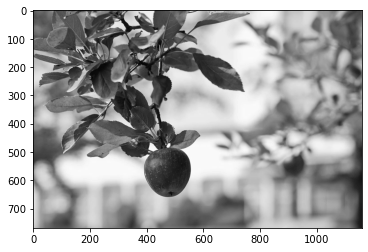

In [34]:
img = cv2.imread('src/appletree.jpg',0)
img2 = img.copy()
plt.imshow(img, cmap = 'gray')

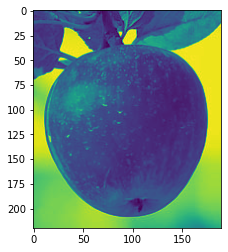

In [39]:
template = img[450:670, 380: 570]
plt.imshow(template)

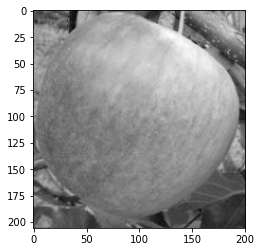

In [37]:
template = cv2.imread('src/apple2.jpg',0)
plt.imshow(template,cmap = 'gray')

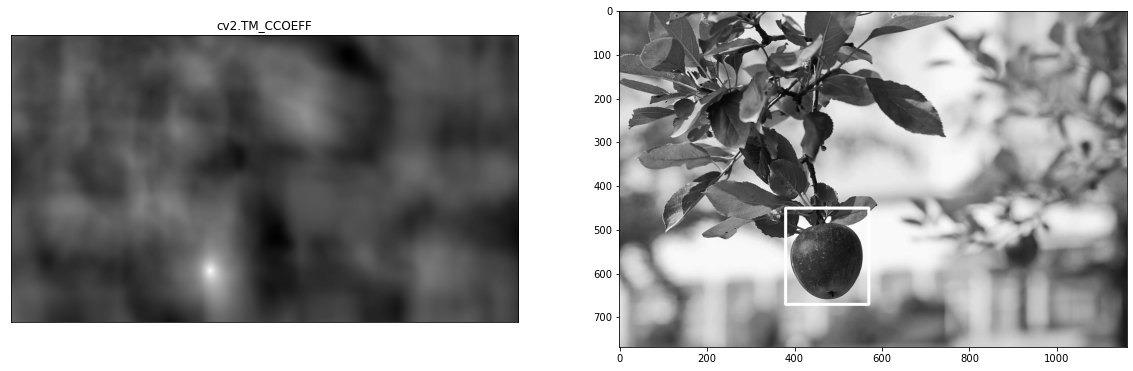

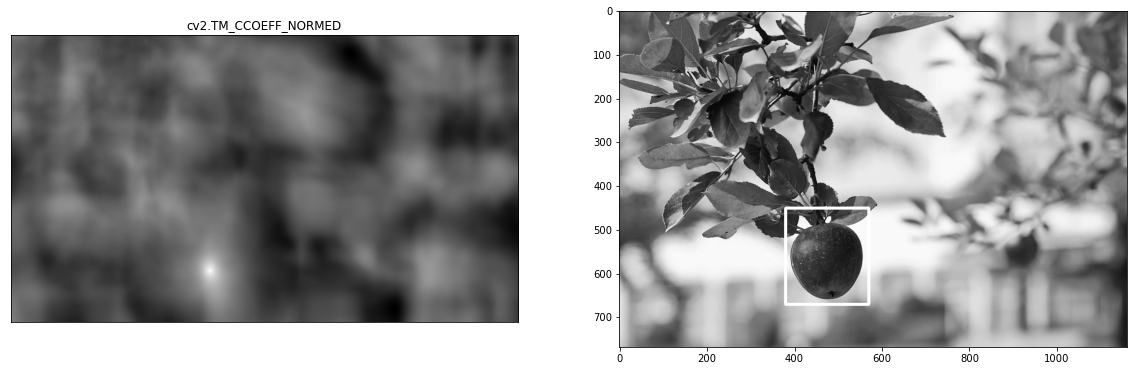

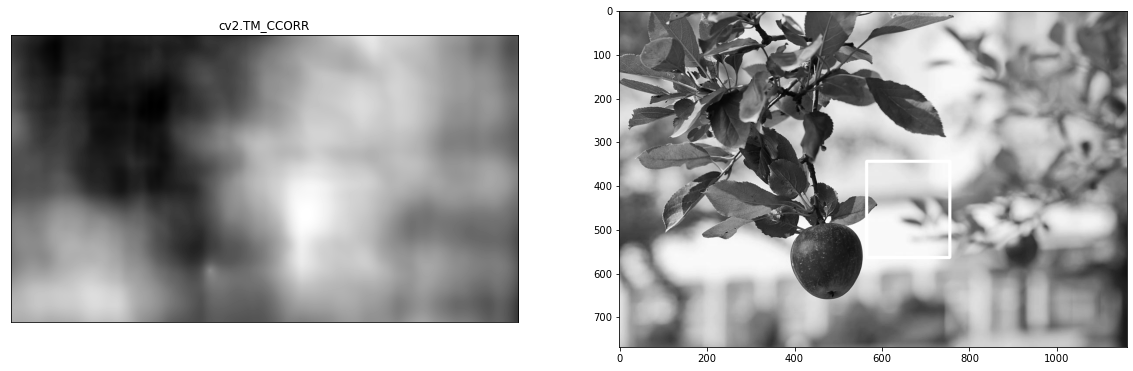

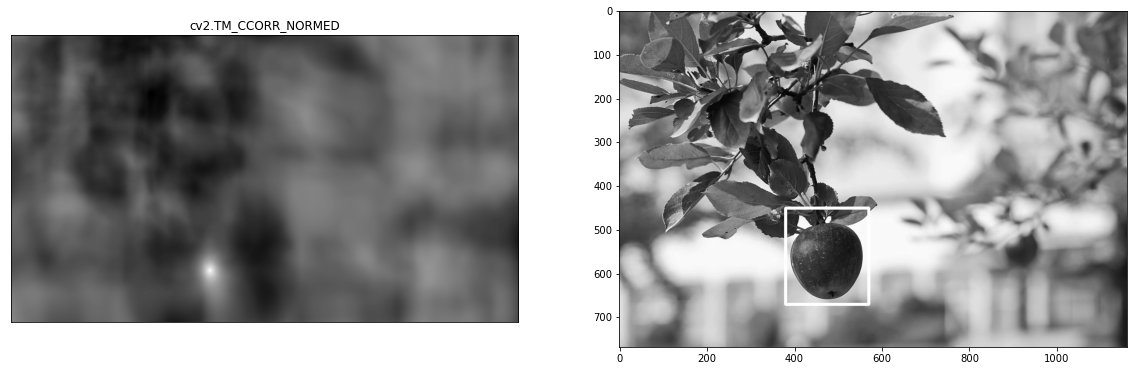

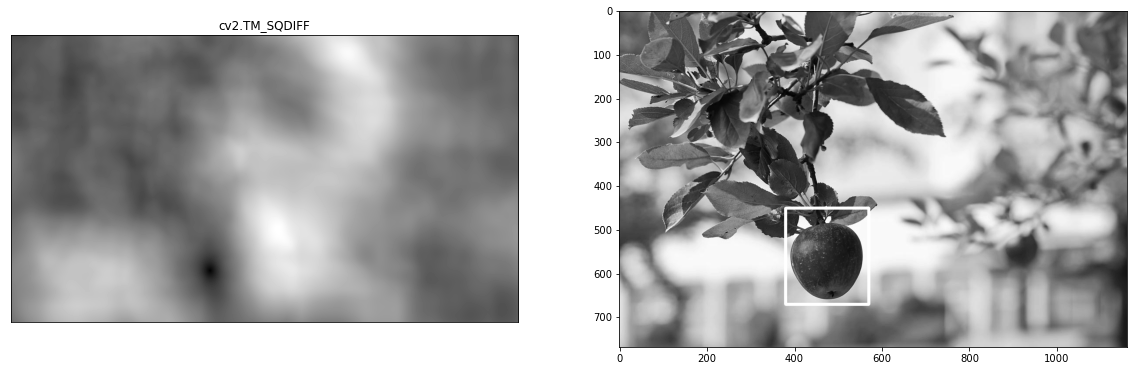

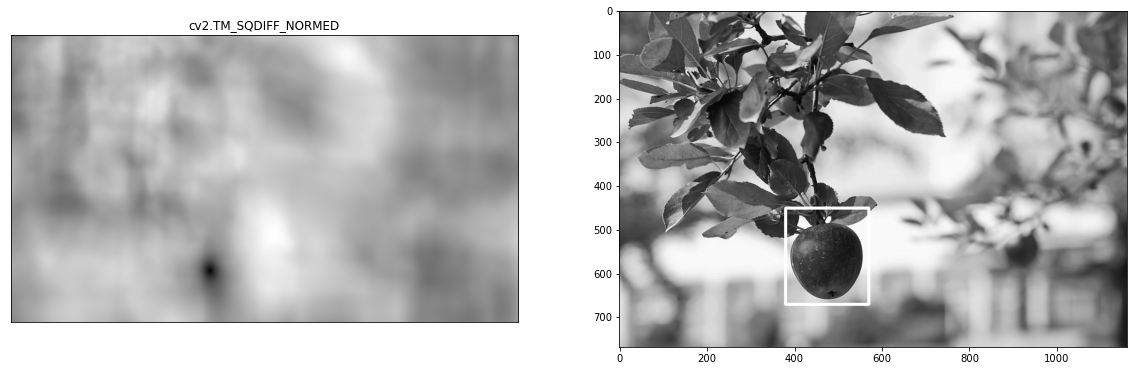

In [40]:
# template 이미지의 가로/세로
w,h = template.shape[::-1]

# Template Match Method
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    res = cv2.matchTemplate(img,template,method)
    min_val,max_val,min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    bottom_right = (top_left[0]+w,top_left[1]+h)
    cv2.rectangle(img,top_left,bottom_right,255,5)
    plt.figure(figsize = (20,12))
    plt.subplot(121),plt.title(meth),plt.imshow(res,cmap='gray'),plt.yticks([]),plt.xticks([])
    plt.subplot(122),plt.imshow(img,cmap='gray')
    plt.show()